In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train =  pd.read_csv('INPUT/train.csv')
predict= pd.read_csv('INPUT/predict.csv')

In [4]:
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605
1,1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565
2,2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720
3,3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793
4,4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381


In [5]:
train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [6]:
#ver que valores tienen las columnas que no son de numeros
train['cut'].value_counts()


Ideal        16175
Premium      10272
Very Good     9146
Good          3676
Fair          1186
Name: cut, dtype: int64

In [7]:
train['color'].value_counts()

G    8469
E    7375
F    7179
H    6229
D    5012
I    4088
J    2103
Name: color, dtype: int64

In [8]:
train['clarity'].value_counts()

SI1     9813
VS2     9217
SI2     6844
VS1     6150
VVS2    3784
VVS1    2780
IF      1326
I1       541
Name: clarity, dtype: int64

In [9]:
#la tabla esta limpia
train.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [10]:
#para convertir los valores nominales en numericos
from sklearn import preprocessing

In [11]:
#transformo la columna de colores en una columna de numeros 
le = preprocessing.LabelEncoder()
train['numeric_color']=le.fit_transform(train['color'])

In [12]:
train['numeric_color']

0        2
1        1
2        0
3        4
4        0
        ..
40450    0
40451    0
40452    3
40453    3
40454    4
Name: numeric_color, Length: 40455, dtype: int64

In [13]:
le = preprocessing.LabelEncoder()
train["numeric_cut"] = le.fit_transform(train["cut"])
train["numeric_cut"]

0        4
1        2
2        4
3        3
4        4
        ..
40450    2
40451    2
40452    3
40453    1
40454    4
Name: numeric_cut, Length: 40455, dtype: int64

In [14]:
le = preprocessing.LabelEncoder()
train["numeric_clarity"] = le.fit_transform(train["clarity"])
train["numeric_clarity"]

0        5
1        2
2        2
3        4
4        2
        ..
40450    4
40451    5
40452    2
40453    5
40454    3
Name: numeric_clarity, Length: 40455, dtype: int64

In [15]:
train

,id,carat,cut,color,clarity,depth,table,x,y,z,price,numeric_color,numeric_cut,numeric_clarity
0,0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605,2,4,5
1,1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565,1,2,2
2,2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720,0,4,2
3,3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793,4,3,4
4,4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.32,Ideal,D,VS1,61.5,56.0,4.41,4.43,2.72,862,0,2,4
40451,40451,0.30,Ideal,D,VS2,60.9,57.0,4.32,4.35,2.64,710,0,2,5
40452,40452,0.47,Premium,G,SI1,62.7,58.0,4.97,4.99,3.12,931,3,3,2
40453,40453,0.40,Good,G,VS2,63.5,56.0,4.68,4.70,2.98,807,3,1,5


In [16]:
train.drop(["id", "cut", "color", "clarity"], axis=1, inplace = True)

In [17]:
train

,carat,depth,table,x,y,z,price,numeric_color,numeric_cut,numeric_clarity
0,0.30,62.8,56.0,4.29,4.31,2.70,605,2,4,5
1,0.34,62.6,55.0,4.46,4.49,2.80,565,1,2,2
2,0.40,60.3,62.0,4.70,4.75,2.85,720,0,4,2
3,0.40,61.8,59.2,4.72,4.74,2.92,793,4,3,4
4,0.90,61.0,63.0,6.10,6.13,3.73,4381,0,4,2
...,...,...,...,...,...,...,...,...,...,...
40450,0.32,61.5,56.0,4.41,4.43,2.72,862,0,2,4
40451,0.30,60.9,57.0,4.32,4.35,2.64,710,0,2,5
40452,0.47,62.7,58.0,4.97,4.99,3.12,931,3,3,2
40453,0.40,63.5,56.0,4.68,4.70,2.98,807,3,1,5


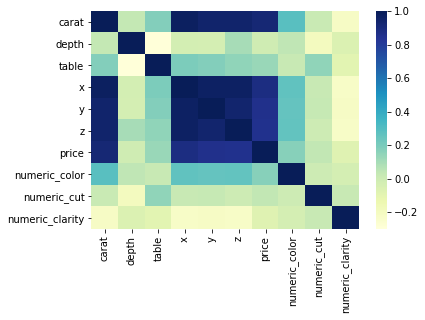

In [18]:
correl= train.corr()
sns.heatmap(correl, cmap="YlGnBu")

In [19]:
#elimino tambien depth y table
train.drop(["depth", "table"], axis=1, inplace = True)

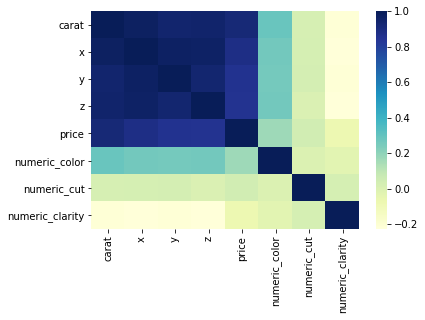

In [20]:
correl= train.corr()
sns.heatmap(correl, cmap="YlGnBu")

In [ ]:
#si tuviera que quitar alguna para simplificar el modelo quitaria obviamente clariy, cut, y color

In [50]:
import numpy as np
from scipy import stats
train_aver = train[(np.abs(stats.zscore(train)) < 3).all(axis=1)]

In [51]:
train_aver

,carat,depth,table,x,y,z,price,numeric_color,numeric_cut,numeric_clarity
0,0.30,62.8,56.0,4.29,4.31,2.70,605,2,4,5
1,0.34,62.6,55.0,4.46,4.49,2.80,565,1,2,2
2,0.40,60.3,62.0,4.70,4.75,2.85,720,0,4,2
3,0.40,61.8,59.2,4.72,4.74,2.92,793,4,3,4
4,0.90,61.0,63.0,6.10,6.13,3.73,4381,0,4,2
...,...,...,...,...,...,...,...,...,...,...
40450,0.32,61.5,56.0,4.41,4.43,2.72,862,0,2,4
40451,0.30,60.9,57.0,4.32,4.35,2.64,710,0,2,5
40452,0.47,62.7,58.0,4.97,4.99,3.12,931,3,3,2
40453,0.40,63.5,56.0,4.68,4.70,2.98,807,3,1,5


In [52]:
columnas = [a for a in train.columns if a not in ['price']]

In [53]:
X =  train[columnas]
y = train['price']

In [54]:
# hacemos el trains split para el entrenamiento. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
#daba fallo pq no habia quitado la columna 'cut' y el programa no entendia que podia hacer con un nominal
y_pred = knc.predict(X_test)

In [57]:
y_pred

array([ 719, 2163, 2353, ...,  612, 5559, 2730])

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [59]:
print ("Accuracy", round(accuracy_score(y_test,y_pred),3))
print ("Precision", round(precision_score(y_test,y_pred, average = 'weighted'),3))
print ('Recall', round (recall_score(y_test, y_pred, average = 'weighted'),3))
print ('F1Score',round(f1_score(y_test,y_pred, average = 'weighted'), 3))

Accuracy 0.025
Precision 0.022
Recall 0.025
F1Score 0.021


/home/carlossanz/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/carlossanz/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
#nos da el problema de zero division, habra q solucionarlo pq da una mierda de accuracy
